# Plot Barcelona streets

In [2]:
from geopandas import GeoDataFrame
import pandas as pd
from shapely.geometry import LineString
import typing as T
from itertools import zip_longest
import os
import folium

In [23]:
def convert_line_to_wkt(line: str) -> LineString:
    splitted_line = line.split(",")
    reshaped_line = reshape_line(splitted_line, chunksize=2, fillvalue=None)
    return LineString(reshaped_line)
    
def reshape_line(line: T.List[str], chunksize: int, fillvalue: int) -> T.Iterable[T.Tuple[float]]:
    """Reshape a line to match the LineString WKT format
    
    This is based on `zip_longest`, read more in 
    <https://docs.python.org/3/library/itertools.html#itertools.zip_longest> and
    in the StackOverflow solution posted in <https://stackoverflow.com/a/434411/5819113>
    
    
        zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D-
       
    """
    args = [iter(float(el) for el in line)] * chunksize
    return zip_longest(*args, fillvalue=fillvalue)

/home/irene/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


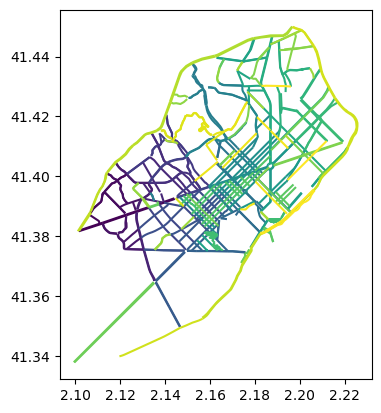

In [32]:
streets = pd.read_csv("../data/transit_relacio_trams.csv", sep=",")
# let's process the whole column
coords_wkt = streets["Coordenades"].apply(lambda line: convert_line_to_wkt(line))
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(streets, crs=crs, geometry=coords_wkt)
ax = gdf.plot(cmap="viridis")
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(barcelona_map)

In [34]:
list_schools = ['EEABB', 'EEBE', 'EETAC', 'EPSEB', 'EPSEM', 'ESEIAAT', 'ETSAB', 'ETSECCPB', 'ETSEIB', 'ETSETB', 'FIB', 'FME', 'FNB', 'FOOT']
data = pd.DataFrame({
   'lon':[1.9866716999999983, 
          2.2231519345468, 
          1.9872505, 
          2.1130787881117503, 
          1.8290409554431237, 
          2.020260374655512,
          2.115296240644385, 
          2.1114770846571855,
         2.11563799713493,
         2.112271912477879,
         2.113366253609662,
         2.1156621824795994,
         2.184497723790824,
         2.0236185376204054],
   'lat':[41.275919200000004, 
          41.414261499999995, 
          41.2755674, 
          41.3835842, 
          41.737127900000004, 
          41.56258005, 
          41.384277749999995, 
          41.38902913883299,
         41.38491311671433,
         41.38881605868467,
         41.38950017997591,
         41.38390531398507,
         41.38396190629874,
         41.56884538208665],
   'Name': list_schools
   #'Num_of_students':[10, 12, 40, 70, 23, 43, 100, 43]
}, dtype=str)
# add marker one by one on the map
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['Name'],
   ).add_to(barcelona_map)

# Show the map again
barcelona_map

# Municipalities

In [ ]:
import geopandas as gpd

path = "../data/municipios.gdb"
spain = gpd.read_file(path)
municipalities = pd.read_csv("../data/codigos_postales_municipios.csv")
spain = pd.merge(spain, municipalities.astype({'municipio_id': 'string','codigo_postal': 'string' }), how='left', left_on=['CODIGOINE'], right_on=['municipio_id'])
spain.head()


# Renta (renta disponible)

In [3]:
renta_data = pd.read_csv("../data/renta.csv")
renta_data['Unnamed: 0'] = renta_data['Unnamed: 0'].str[0:5] # WE loose names for zip code regions in this step
renta_data = renta_data.rename(columns={'Unnamed: 0': 'ZipCode'})
renta_data['ZipCode'] = pd.to_numeric(renta_data['ZipCode'], errors='coerce')
renta_data = renta_data[renta_data['ZipCode'].notna()].astype({'ZipCode': int})
renta_data

,ZipCode,Número dedeclaraciones,Renta brutamedia,Rentadisponiblemedia,Rentas del trabajo,Rentasexentas,Rentabruta,Cotizacionessocialesa la SS,Cuota resultante deautoliquidación,Rentadisponible
1,4001,2.537,38.909,30.135,62.643.114,2.965.184,98.713.318,2.410.370,19.850.407,76.452.667
2,4002,5.801,19.443,16.475,91.712.260,7.347.787,112.786.003,3.995.016,13.221.475,95.569.512
3,4003,4.714,25.964,21.393,99.605.423,4.646.250,122.395.014,4.139.269,17.410.515,100.845.230
4,4004,5.983,33.544,26.614,152.028.935,5.733.287,200.694.138,5.537.723,35.927.133,159.229.545
5,4005,6.816,28.305,23.054,155.666.972,7.780.634,192.927.605,6.306.579,29.491.919,157.137.532
...,...,...,...,...,...,...,...,...,...,...
889,26005,17.791,26.571,21.996,394.094.296,17.137.295,472.727.564,17.594.097,63.796.123,391.339.265
890,26006,9.053,29.655,23.897,228.374.054,9.039.848,268.470.839,12.162.491,39.980.624,216.339.451
891,26007,19.046,34.487,27.342,521.588.943,19.650.674,656.835.948,26.393.958,109.701.510,520.754.035
892,26008,2.750,34.208,27.101,77.300.415,3.238.282,94.071.585,4.281.450,15.261.748,74.528.387
